In [1]:
## PROBLEM STATEMENT

# Identify key revenues and profit drivers across products, channels, and regions
# Uncover seasonal trends and outliers
# Align performance against budgets
# Use these insights to optimize pricing, promotion, and market expansion for sustainable growth and reduced concentration risk.

In [15]:
# Input Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('Regional Sales Dataset.xlsx', sheet_name=None)

In [5]:
df

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
 0       SO - 000225 2014-01-01                  126    Wholesale   
 1      SO - 0003378 2014-01-01                   96  Distributor   
 2      SO - 0005126 2014-01-01                    8    Wholesale   
 3      SO - 0005614 2014-01-01                   42       Export   
 4      SO - 0005781 2014-01-01                   73    Wholesale   
 ...             ...        ...                  ...          ...   
 64099  SO - 0007573 2018-02-28                   74    Wholesale   
 64100  SO - 0007706 2018-02-28                   51       Export   
 64101  SO - 0007718 2018-02-28                  136  Distributor   
 64102  SO - 0008084 2018-02-28                  158  Distributor   
 64103  SO - 0008654 2018-02-28                   22  Distributor   
 
       Currency Code Warehouse Code  Delivery Region Index  \
 0               USD         AXW291                    364   
 1               USD         A

In [6]:
# Assign Dataframe to Different Sheets

df_sales = df['Sales Orders']
df_customers = df['Customers']
df_products = df['Products']
df_regions = df['Regions']
df_state_reg = df['State Regions']
df_budgets = df['2017 Budgets']

In [7]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [8]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [9]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [10]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [11]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [12]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [13]:
# Ini ngerapiin excelnya aja, bikin new header

In [14]:
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [15]:
# Now, let's do an instant value check
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [16]:
df_customers.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

In [17]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [18]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [19]:
df_state_reg.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [20]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

In [36]:
## DATA CLEANING AND WRANGLING

In [37]:
# We had done the ER Diagram thing, right, so we'll watch the relationships available between the colomns. 
# Contoh, we'll be watching Sales Order with Customers, and so on.
# See them in here https://docs.google.com/document/d/12zKsY4uAli_RzDoTKSZAuQBL46bLWW-NymOz4Jggaws/edit?tab=t.0 page 12 paling bawah.

In [ ]:
# I think he wants to merge things here.

In [ ]:
# Merge with Customers

In [21]:
df = df_sales.merge(
    df_customers,
    how='left',
    left_on = "Customer Name Index",
    right_on = "Customer Index"
)

In [ ]:
# So left means it uses left approach: 
# Keep all the rows from df_sales.
# For each row in df_sales, match it with data from df_customers based on the matching key.
# If there is no match, the result will have NaN values for columns from df_customers.
# The left on the colomn used to match two datasets, buat df_sales using Customer Name Index, yg df_cust use Cust Index.

In [22]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [23]:
# Now, merge with products

df = df.merge(
    df_products,
    how='left',
    left_on = "Product Description Index",
    right_on = "Index"
)

In [24]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [25]:
# Merge with regions

df = df.merge(
    df_regions,
    how='left',
    left_on = "Delivery Region Index",
    right_on = "id"
)

In [26]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [27]:
# Merge with state index
# The difference is in the df dataset, it already has State, so just move the Regions

df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on = "state_code",
    right_on = "State Code"
)

In [28]:
# Merge with Budgets
df = df.merge(
    df_budgets,
    how='left',
    on = "Product Name"
)

In [29]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [30]:
df.to_csv("Temp File 1.csv")

In [2]:
import pandas as pd
df=pd.read_csv('Temp File 1.csv')

In [ ]:
# Beresin redundant colomns
# Customer Index, Index, id, State Code

In [ ]:
# Katanya bedanya "" dan '' itu gaada, tapi mungkin kalo di strings lo ada '/", pake the other aja.
# Nah terus buat bedanya iloc dan loc tuh keknya kalo lo lupa sampe mana, bikin pake loc biar lo liat pake nama kolomnya.
# contoh:
# df.iloc[0]
# df.loc[0, 'Region']

In [31]:
print(df.iloc[0,2])

126


In [32]:
print(df.loc[5:10,['Channel','Region']])

      Channel     Region
5      Export    Midwest
6   Wholesale  Northeast
7   Wholesale       West
8   Wholesale       West
9      Export      South
10  Wholesale    Midwest


In [33]:
# Clean by dropping some of the variables:

cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code']
df = df.drop(columns = cols_to_drop, errors='ignore')

In [ ]:
# You can also make it this way:
# df.drop(columns = ['Customer Index', 'Index'], errors = 'ignore', inplace=True)
# inplace = True artinya it modifies df directly, bukan make new dataset. 

In [ ]:
# Kalo mau drop rows, you can use index like df = df.drop([0, 1, 2], errors='ignore')

In [34]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [56]:
# convert column to lower case for consistency

In [57]:
# Now focus on things which are needed

In [35]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [3]:
df.columns = df.columns.str.lower()
df.columns.values

array(['unnamed: 0', 'ordernumber', 'orderdate', 'customer name index',
       'channel', 'currency code', 'warehouse code',
       'delivery region index', 'product description index',
       'order quantity', 'unit price', 'line total', 'total unit cost',
       'customer index', 'customer names', 'index', 'product name', 'id',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone',
       'state code', 'region', '2017 budgets'], dtype=object)

In [4]:
cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets',
    'population',
    'median_income'
]
df = df[cols_to_keep]

In [5]:
df.head(5)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets,population,median_income
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231,145674,36466
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120,55586,54176
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270,79510,124759
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555,84067,30019
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329,58007,63158


df = df.rename(columns = {
    'ordernumber':'order_number',
    'orderdate':'order_date',
    'customer names' = 'customer_name',
    'product name'='product_name',
    'order quantity' = 'order_quantity',
    'unit price' = 'unit_price',
    'line total' = 'revenue',
    'total unit cost' = 'cost',
    'state'='state_name',
    '2017 budgets' = 'budget'
})

In [6]:
df = df.rename(columns = { 
    'ordernumber':'order_number', 
    'orderdate':'order_date', 
    'customer names' : 'customer_name', 
    'product name':'product_name', 
    'order quantity' : 'order_quantity', 
    'unit price' : 'unit_price', 
    'line total' : 'revenue', 
    'total unit cost' : 'cost', 
    'state' : 'state_name', 
    '2017 budgets' : 'budget' 
})
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state_name,region,latitude,longitude,budget,population,median_income
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231,145674,36466
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120,55586,54176
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270,79510,124759
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555,84067,30019
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329,58007,63158


In [ ]:
# The budgets are in 2017 budgets, so if the order date is not 2017, we can not use the 2017 budgets on that product.
# So we need to black out the 2017 budgets if it's ordered not in 2017.

In [64]:
# The differences in (, [, and { is
# [] for list
# {} for mapping, if you want to map something into something
# () function calls, like df.rename()

In [9]:
import pandas as pd

# Convert 'order_date' column to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Set 'budget' to NA where the year is not 2017
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

# Display the first few rows
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state_name,region,latitude,longitude,budget,population,median_income
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,145674,36466
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,55586,54176
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,79510,124759
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,84067,30019
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,58007,63158


In [10]:
# Now filter the data to be 2017 data
df_2017 = df[df['order_date'].dt.year==2017]
df.isnull().sum()

order_number          0
order_date            0
customer_name         0
channel               0
product_name          0
order_quantity        0
unit_price            0
revenue               0
cost                  0
state_code            0
county                0
state_name            0
region                0
latitude              0
longitude             0
budget            48841
population            0
median_income         0
dtype: int64

In [11]:
df_2017.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state_name,region,latitude,longitude,budget,population,median_income
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684,69156,41107
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645,60358,45358
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315,111666,42044
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329,58799,47450
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565,100270,41308


In [ ]:
# NOW WE'RE GOING TO THE EXPLANATORY THINGY
# FOR PROFIT: revenue - total cost

In [12]:
df['total_cost'] = df['order_quantity']*df['cost']
df['profit'] = df['revenue'] - df['total_cost']
df['profit_margin_pct'] = df['profit']/df['revenue']*100
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,...,state_name,region,latitude,longitude,budget,population,median_income,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,Georgia,South,32.08354,-81.09983,NaN,145674,36466,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Indiana,Midwest,39.61366,-86.10665,NaN,55586,54176,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,California,West,37.66243,-121.87468,NaN,79510,124759,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Indiana,Midwest,39.16533,-86.52639,NaN,84067,30019,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Connecticut,Northeast,41.77524,-72.52443,NaN,58007,63158,10082.160,8249.040,45.0


In [44]:
## NOW THE ANALYSIS
# Detect the seasonality in sales trend

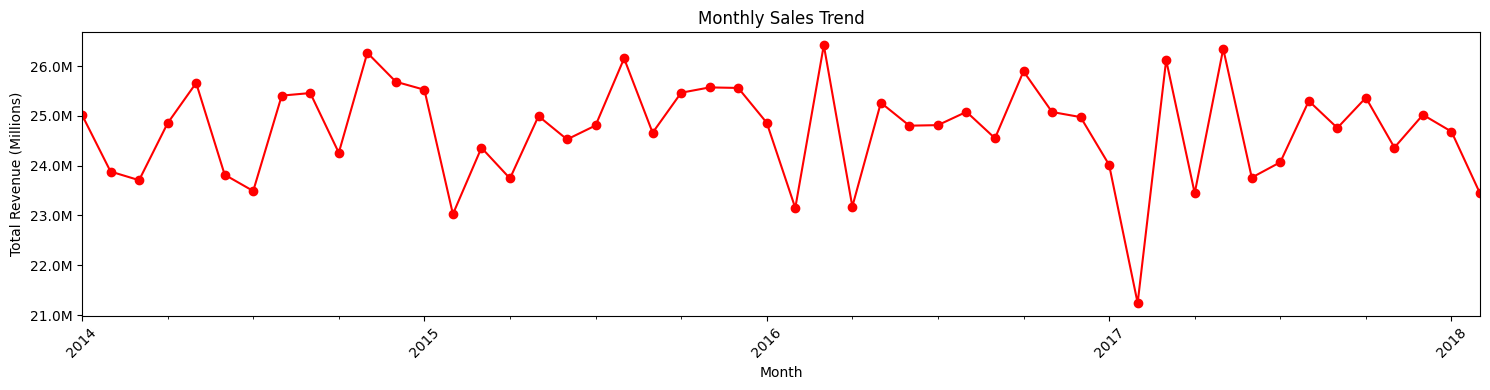

In [52]:
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('order_month')['revenue'].sum()
plt.figure(figsize=(15,4))
monthly_sales.plot(marker='o', color='red')
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# This becommes a time series graph because of this code "df['order_month'] = df['order_date'].dt.to_period('M')" dan dia bikin per period.

In [49]:
# Setelah liat seasonalitynya, kita liat the trend is downward pas around january, tapi buat higher upsnya gaada.

In [13]:
df['month']=df['order_date'].dt.month_name()

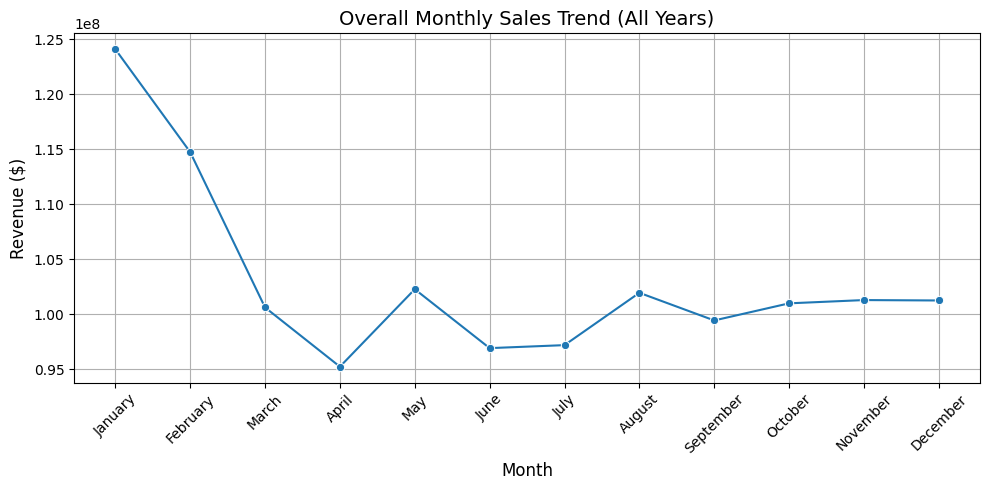

In [16]:
# Aggregate revenue by month across all years
monthly_trend = df.groupby('month')['revenue'].sum().reset_index()

# Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_values('month')

# Create the line chart
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trend, x='month', y='revenue', marker='o')
plt.title('Overall Monthly Sales Trend (All Years)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
df.to_csv('states.csv')

In [ ]:
# January high sendiri karena yg bulan lain cuma ada 4 tahun, meanwhile januari ada 5 tahun. jadi dicancel ajaa yang tahun terakhirnya.

C:\Users\nitar\AppData\Local\Temp\ipykernel_2304\2053629495.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_date'] = pd.to_datetime(df_new['order_date'])
C:\Users\nitar\AppData\Local\Temp\ipykernel_2304\2053629495.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = df_new['order_date'].dt.strftime('%B')


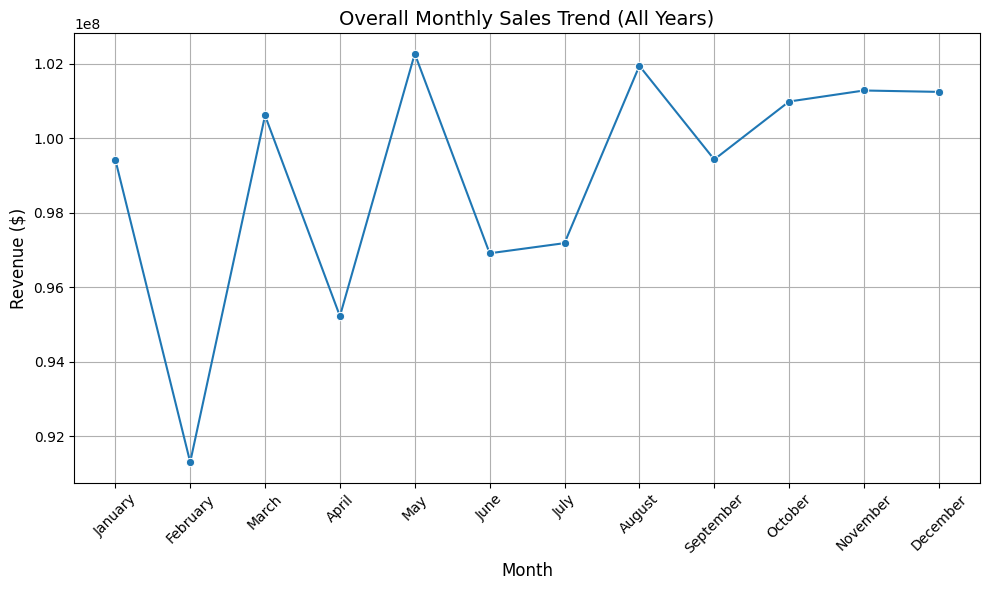

In [20]:
# Remove records from January and February 2018
df_new = df[~((df['order_date'].dt.year == 2018) & (df['order_date'].dt.month.isin([1, 2])))]

# Assuming df is your DataFrame
# Convert order_date to datetime
df_new['order_date'] = pd.to_datetime(df_new['order_date'])

# Extract month name for grouping
df_new['month'] = df_new['order_date'].dt.strftime('%B')

# Aggregate revenue by month across all years
monthly_trend = df_new.groupby('month')['revenue'].sum().reset_index()

# Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_values('month')

# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trend, x='month', y='revenue', marker='o')
plt.title('Overall Monthly Sales Trend (All Years)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
df.to_csv('states.csv')

In [23]:
product_revenue = df_new.groupby('product_name')['revenue'].sum().reset_index()
product_revenue
product_revenue.to_csv('product 1.csv')

In [ ]:
# So in conclusion, I think there's not that "pattern" visible, no such impact.

In [64]:
# Find top 10 products by revenue

product_revenue = df_new.groupby('product_name')['revenue'].sum().reset_index()
top_10_product = product_revenue.sort_values(by='revenue', ascending=False).head(10)

labels = top_10_product['product_name'].tolist()
data = top_10_product['revenue'].tolist()

print("Labels for Chart.js:", labels)
print("Data for Chart.js:", data)

Labels for Chart.js: ['Product 26', 'Product 25', 'Product 13', 'Product 14', 'Product 5', 'Product 15', 'Product 2', 'Product 4', 'Product 1', 'Product 3']
Data for Chart.js: [112454990.9, 105715762.4, 75190019.7, 72516666.10000001, 68032711.2, 64933726.7, 54976803.1, 54558669.5, 53678832.2, 49935227.300000004]


C:\Users\nitar\AppData\Local\Temp\ipykernel_23656\3027306109.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')


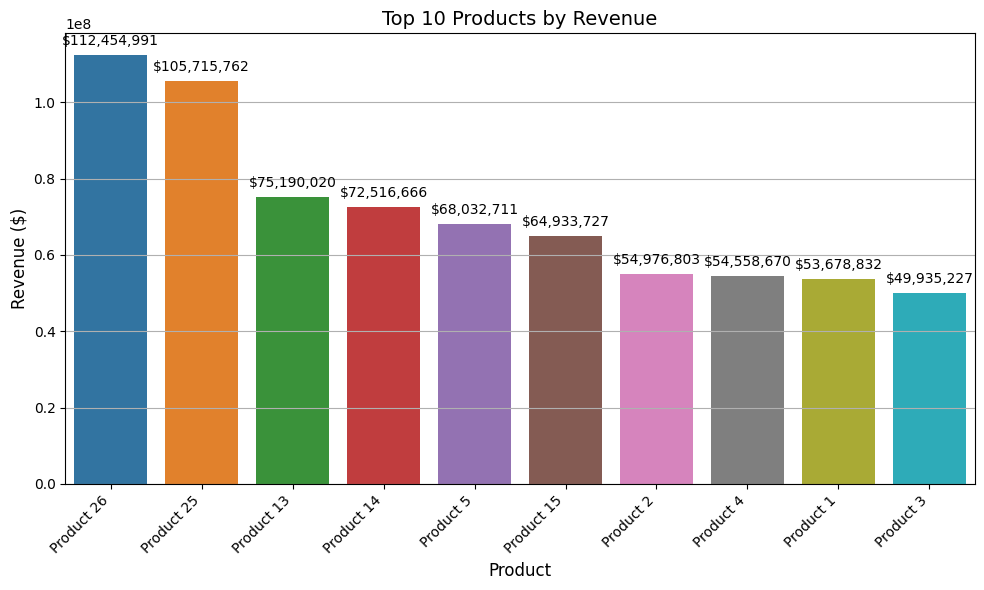

In [66]:
# Now plot a barchart

# Aggregate revenue by product
product_revenue = df_new.groupby('product_name')['revenue'].sum().reset_index()

# Get top 10 products by revenue
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')

# Add labels on top of each bar
for p in barplot.patches:
    barplot.annotate(
        f'${p.get_height():,.0f}',  # Format revenue as $X,XXX
        (p.get_x() + p.get_width() / 2, p.get_height()),  # x, y coordinates
        ha='center', va='bottom', fontsize=10, color='black',
        xytext=(0, 5), textcoords='offset points'  # Slightly above the bar
    )
plt.title('Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\nitar\AppData\Local\Temp\ipykernel_23656\2544440474.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')


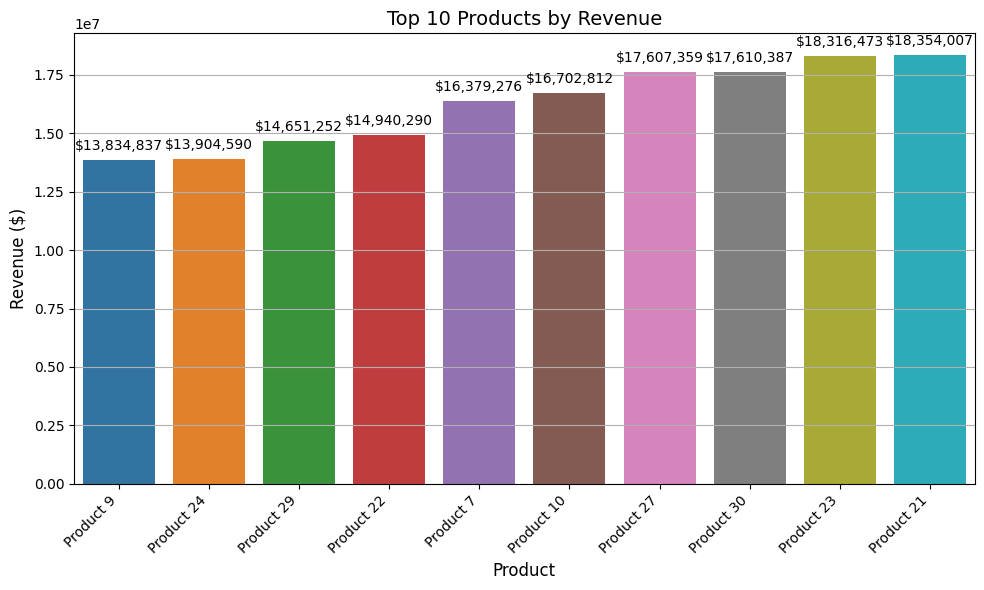

In [67]:
# If you want the bottom ten, just use ascending = True

# Aggregate revenue by product
product_revenue = df_new.groupby('product_name')['revenue'].sum().reset_index()

# Get top 10 products by revenue
top_10_products = product_revenue.sort_values(by='revenue', ascending=True).head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')

# Add labels on top of each bar
for p in barplot.patches:
    barplot.annotate(
        f'${p.get_height():,.0f}',  # Format revenue as $X,XXX
        (p.get_x() + p.get_width() / 2, p.get_height()),  # x, y coordinates
        ha='center', va='bottom', fontsize=10, color='black',
        xytext=(0, 5), textcoords='offset points'  # Slightly above the bar
    )
plt.title('Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()

# Show the plot
plt.show()

In [68]:
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,...,latitude,longitude,budget,population,median_income,total_cost,profit,profit_margin_pct,order_month,month
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,32.08354,-81.09983,NaN,145674,36466,10946.058,4048.542,27.0,2014-01,January
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,39.61366,-86.10665,NaN,55586,54176,13969.098,11899.602,46.0,2014-01,January
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,37.66243,-121.87468,NaN,79510,124759,4108.440,1760.760,30.0,2014-01,January
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,39.16533,-86.52639,NaN,84067,30019,7201.964,9166.136,56.0,2014-01,January
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,41.77524,-72.52443,NaN,58007,63158,10082.160,8249.040,45.0,2014-01,January


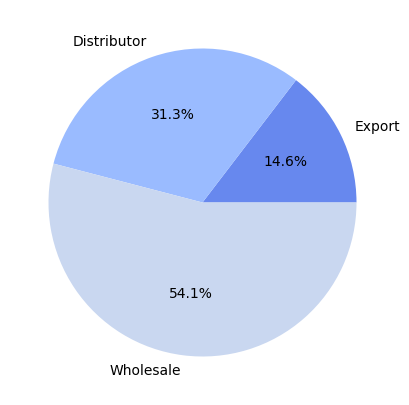

In [25]:
# Now we wanna see sales by channel

chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=True)
# ate the bar chart
plt.figure(figsize=(5, 5))

plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)

plt.show()

In [28]:
chan_sales
chan_sales.to_csv('Product 2.csv')

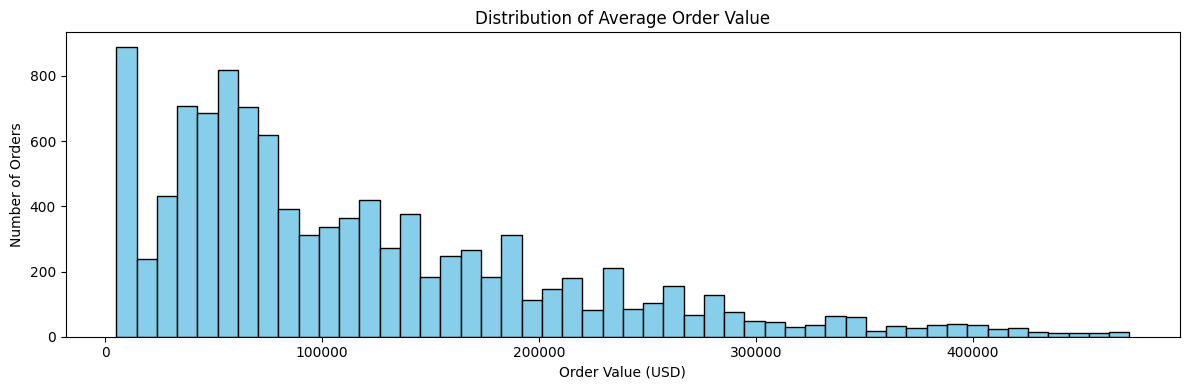

In [29]:
# Where is the value concentrated at?

aov = df.groupby('order_number')['revenue'].sum()
plt.figure(figsize=(12,4))
plt.hist(
    aov,
    bins=50,
    color='skyblue',
    edgecolor='black'
)

plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

plt.tight_layout()

plt.show()

In [31]:
aov
aov.to_csv('Customer 1.csv')

In [79]:
# The Graph is not normally distributed, the majority of the things are in 20 sampe 100.000 per number of orders. 

In [ ]:
# Unit Price Distribution per Product
# Top 10 States and Revenue and Order Count
# Average Profit Marging by Channel
# Top and Bottom 10 Customers by Revenue
# Customer Segmentation: Revenue vs Profit Margin
# Correlation Heatmap

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       64104 non-null  object        
 1   order_date         64104 non-null  datetime64[ns]
 2   customer_name      64104 non-null  object        
 3   channel            64104 non-null  object        
 4   product_name       64104 non-null  object        
 5   order_quantity     64104 non-null  int64         
 6   unit_price         64104 non-null  float64       
 7   revenue            64104 non-null  float64       
 8   cost               64104 non-null  float64       
 9   state_code         64104 non-null  object        
 10  county             64104 non-null  object        
 11  state_name         64104 non-null  object        
 12  region             64104 non-null  object        
 13  latitude           64104 non-null  float64       
 14  longit

In [85]:
top_10_product_price = df.sort_values(by='unit_price', ascending=True).head(10)['product_name']
print(top_10_product_price)

29818    Product 18
63946    Product 26
50993    Product 25
27973    Product 25
38265    Product 25
4687     Product 26
22926    Product 23
52568    Product 19
20156    Product 19
32329    Product 21
Name: product_name, dtype: object


In [91]:
product_revenue = df.groupby('product_name')['revenue'].sum()
print(product_revenue)

product_name
Product 1      55952289.6
Product 10     17660583.6
Product 11     22324426.8
Product 12     24173184.6
Product 13     78281379.6
Product 14     75390396.6
Product 15     67331623.2
Product 16     37446541.2
Product 17     40594442.4
Product 18     46228954.8
Product 19     34446174.0
Product 2      57401097.6
Product 20     39645159.6
Product 21     19246875.6
Product 22     15638202.0
Product 23     18856855.2
Product 24     14555053.2
Product 25    109473966.6
Product 26    117291821.4
Product 27     18377791.8
Product 28     20823439.2
Product 29     15311014.2
Product 3      51764816.4
Product 30     18590168.4
Product 4      56701537.2
Product 5      70804380.6
Product 6      40149147.0
Product 7      17058267.0
Product 8      19850679.6
Product 9      14598630.0
Name: revenue, dtype: float64


In [96]:
corr_matrix = df.groupby('product_name')[['revenue', 'unit_price']].corr()

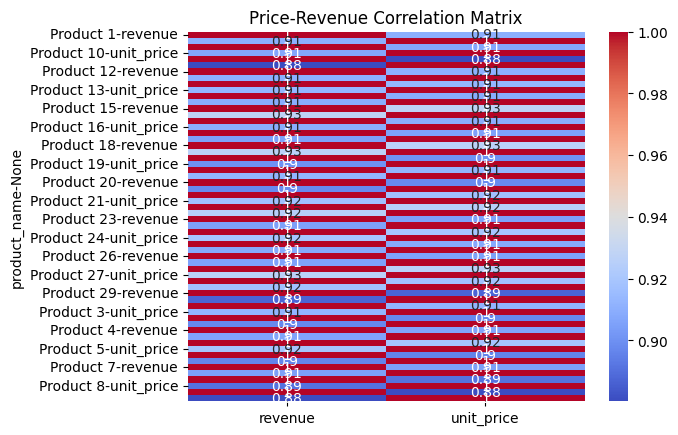

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Price‑Revenue Correlation Matrix')
plt.show()

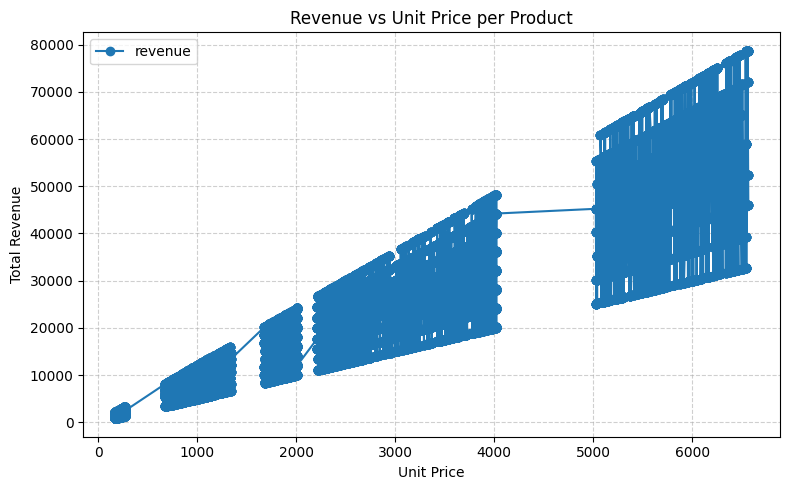

In [99]:
# Sort by price to make a coherent line plot
df_sorted = df.sort_values('unit_price')

# Use pandas .plot() to get a basic line + markers
ax = df_sorted.plot(
    x='unit_price',
    y='revenue',
    kind='line',
    marker='o',
    figsize=(8, 5),
    title='Revenue vs Unit Price per Product'
)
ax.set_xlabel('Unit Price')
ax.set_ylabel('Total Revenue')
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

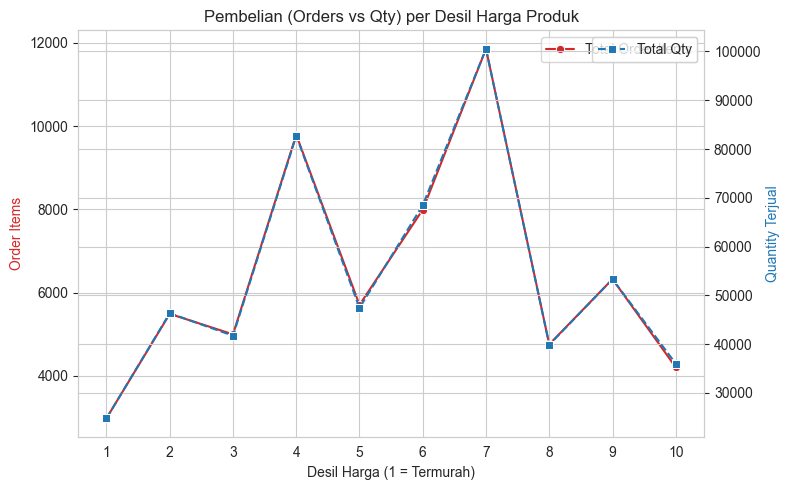

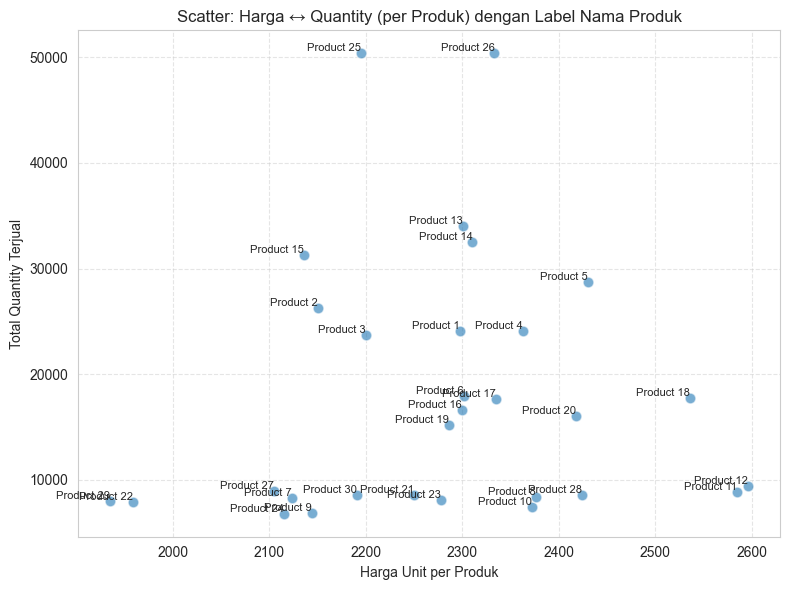

C:\Users\nitar\AppData\Local\Temp\ipykernel_2304\3350379536.py:131: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()


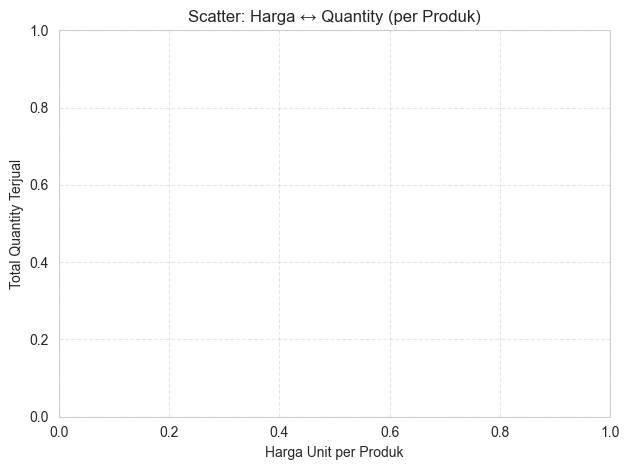

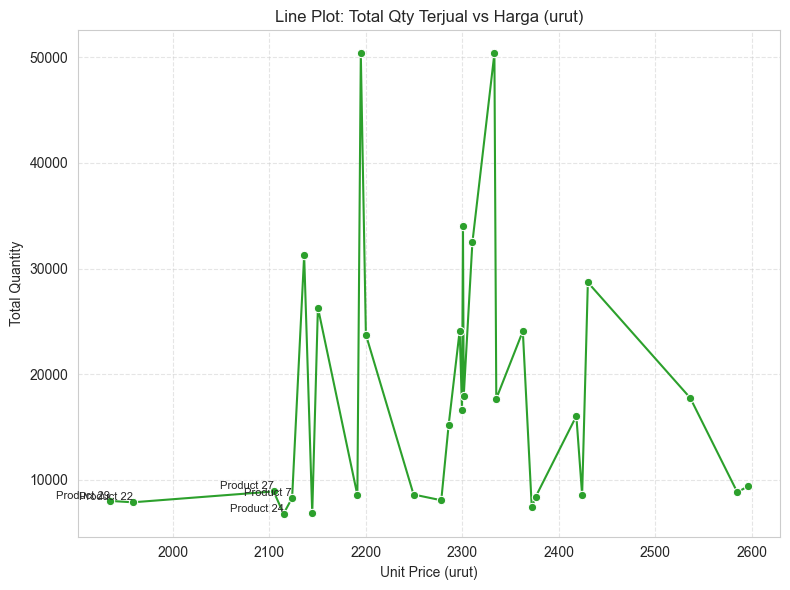

C:\Users\nitar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


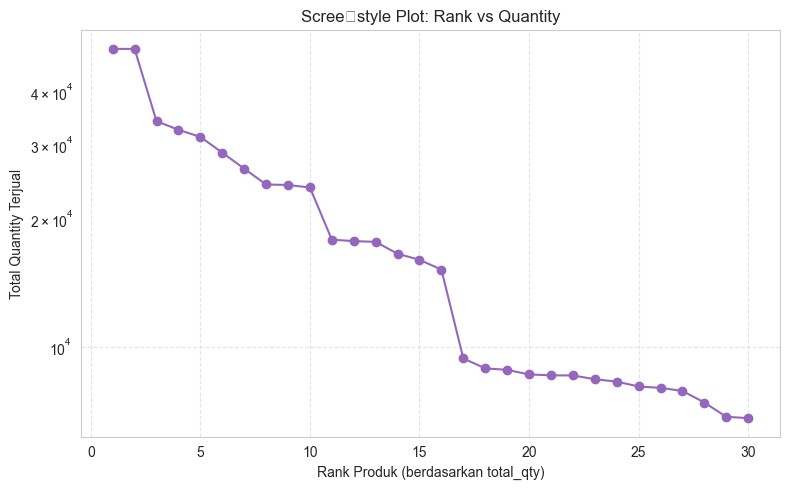

#### Top‑5 Produk berdasarkan Total Quantity:
product_name  unit_price  total_qty
  Product 26 2333.241093      50364
  Product 25 2194.850250      50358
  Product 13 2300.686322      34014
  Product 14 2310.447589      32484
  Product 15 2136.179708      31242

#### Tabel Decile:
 price_decile  cnt_products  total_orders_items  total_qty
            1             3                2982      24792
            2             3                5490      46326
            3             3                4998      41718
            4             3                9792      82722
            5             3                5706      47418
            6             3                7992      68484
            7             3               11856     100530
            8             3                4758      39864
            9             3                6324      53310
           10             3                4206      35982


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔧 1. Muat Data
# Kalau data kamu dalam CSV:
# df = pd.read_csv('order_data.csv')
# Atau kalau sudah tersedia DataFrame `df`, pastikan mengandung kolom:
# ['product_name', 'unit_price', 'order_number', 'order_quantity']

# ⚙️ 2. Agregasi per Produk
df_prod = (
    df
    .groupby('product_name', as_index=False)
    .agg(
        unit_price=('unit_price', 'mean'),
        total_order_items=('order_number', 'count'),
        distinct_orders=('order_number', 'nunique'),
        total_qty=('order_quantity', 'sum'),
    )
)

# Deret produk berdasarkan harga
df_by_price = df_prod.sort_values('unit_price').reset_index(drop=True)
# Deret produk berdasarkan total_qty (terlaris dulu)
df_by_qty   = df_prod.sort_values('total_qty', ascending=False).reset_index(drop=True)

# ➕ 3. Desil Berdasarkan Unit Price
# Kita buat 10 grup decile berdasarkan distribusi price-nya
df_by_price['price_decile'] = (
    pd.qcut(df_by_price['unit_price'], q=10, labels=False, duplicates='drop')
      .add(1)  # dari 1 sampai ~10
)
# metode menempatkan ~sama banyak produk dalam tiap decile :contentReference[oaicite:2]{index=2}

# 🔢 4. Agregasi per Decile
agg = (
    df_by_price
    .groupby('price_decile', as_index=False)
    .agg(
        cnt_products=('product_name', 'count'),
        total_orders_items=('total_order_items', 'sum'),
        total_qty=('total_qty', 'sum'),
    )
    .sort_values('price_decile')
)

# 🎨 5. Plot Desil — Total Order Items & Total Qty
sns.set_style('whitegrid')
fig, ax1 = plt.subplots(figsize=(8, 5))
ax2 = ax1.twinx()
sns.lineplot(
    x='price_decile', y='total_orders_items', data=agg,
    marker='o', color='tab:red', ax=ax1, label='Total Order Items'
)
sns.lineplot(
    x='price_decile', y='total_qty', data=agg,
    marker='s', linestyle='--', color='tab:blue', ax=ax2, label='Total Qty'
)
ax1.set_xlabel('Desil Harga (1 = Termurah)')
ax1.set_ylabel('Order Items', color='tab:red')
ax2.set_ylabel('Quantity Terjual', color='tab:blue')
ax1.set_title('Pembelian (Orders vs Qty) per Desil Harga Produk')
ax1.set_xticks(range(1, agg['price_decile'].max() + 1))
fig.tight_layout()

# 📊 6. Scatter Plot Semua Produk (Harga vs Total Qty)
plt.figure(figsize=(8, 6))

plt.scatter(
    x=df_prod['unit_price'],
    y=df_prod['total_qty'],
    alpha=0.6,
    s=60,
    edgecolor='w'
)

# Loop over each row and annotate with product_name
for i, row in df_prod.iterrows():
    plt.text(
        row['unit_price'],
        row['total_qty'],
        row['product_name'],
        fontsize=8,
        ha='right',  # horizontal alignment
        va='bottom'  # vertical alignment
    )

plt.xlabel('Harga Unit per Produk')
plt.ylabel('Total Quantity Terjual')
plt.title('Scatter: Harga ↔ Quantity (per Produk) dengan Label Nama Produk')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.xlabel('Harga Unit per Produk')
plt.ylabel('Total Quantity Terjual')
plt.title('Scatter: Harga ↔ Quantity (per Produk)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
# pakai marker alpha supaya overlap bisa terlihat :contentReference[oaicite:3]{index=3}

# 🪜 7. Line Plot: Connect-the‑dots Urut Harga
plt.figure(figsize=(8, 6))
sns.lineplot(
    x='unit_price', y='total_qty',
    data=df_by_price,
    marker='o',
    color='tab:green'
)
plt.xlabel('Unit Price (urut)')
plt.ylabel('Total Quantity')
plt.title('Line Plot: Total Qty Terjual vs Harga (urut)')
plt.grid(True, linestyle='--', alpha=0.5)
# Opsional: beri label produk tertinggi
for idx, row in df_by_price.head(5).iterrows():
    plt.text(row['unit_price'], row['total_qty'],
             row['product_name'], fontsize=8,
             va='bottom', ha='right')
plt.tight_layout()

# 📉 8. Scree‑style Plot (Rank by Quantity)
df_by_qty['rank'] = range(1, len(df_by_qty) + 1)
plt.figure(figsize=(8, 5))
plt.plot(df_by_qty['rank'], df_by_qty['total_qty'], marker='o', color='tab:purple')
plt.xlabel('Rank Produk (berdasarkan total_qty)')
plt.ylabel('Total Quantity Terjual')
plt.title('Scree‑style Plot: Rank vs Quantity')
plt.yscale('log')  # opsional, untuk data dengan skew yang tinggi
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
# konsep mirip scree plot yang biasa untuk PCA, tapi ini diterapkan ke penjualan produk :contentReference[oaicite:4]{index=4}

# ✅ 9. Tampilkan Semua Plot
plt.show()

# 📋 10. Output DataFrame Untung Analisis
print("#### Top‑5 Produk berdasarkan Total Quantity:")
print(df_by_qty.head(5)[['product_name', 'unit_price', 'total_qty']].to_string(index=False))
print("\n#### Tabel Decile:")
print(agg.to_string(index=False))


In [35]:
df_prod
df_prod.to_csv('Product 3 and 4.csv')

In [ ]:
# Elasticity yang paling tinggi di kuadran dua di tabel yg pake line ijo.

Top 10 states by total revenue:
state_name
California       228785436.0
Illinois         111050965.7
Florida           90204679.5
Texas             84011903.0
New York          55534960.0
Indiana           54601690.2
New Jersey        46830956.5
Connecticut       44251228.7
Michigan          39025315.8
Massachusetts     35011942.1


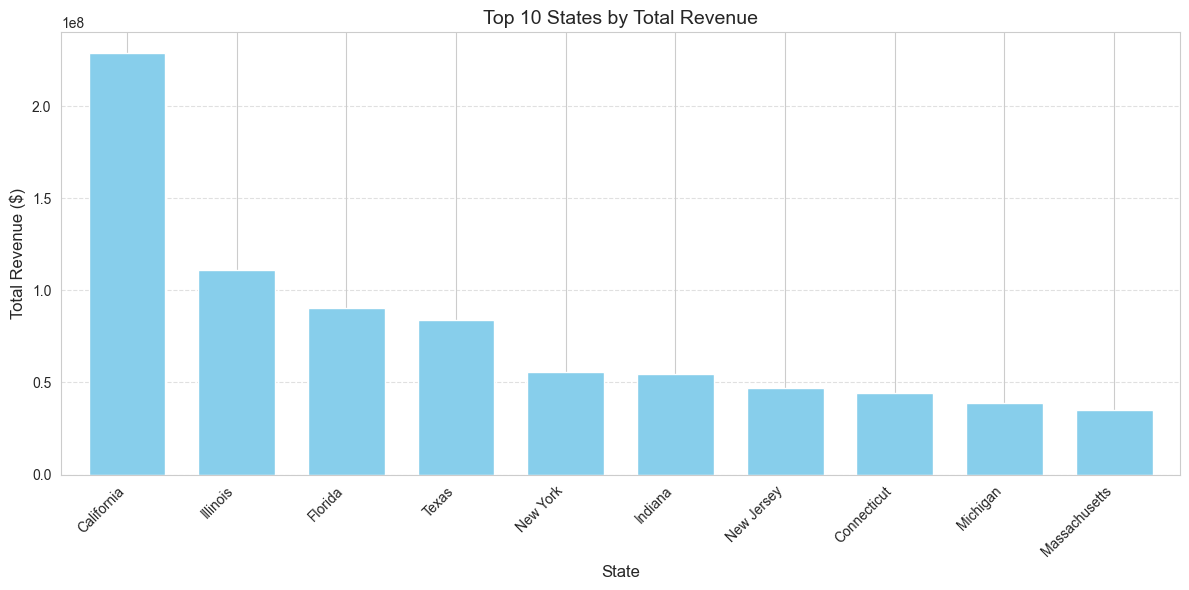

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# ─── 1. Compute total revenue per state
state_rev = (df.groupby('state_name', as_index=True)['revenue'].sum().sort_values(ascending=False).head(10))
print("Top 10 states by total revenue:")
print(state_rev.to_string())

# ─── 2. (Optional) Compute 'order count' if you also want to plot that later
state_cnt = (df.groupby('state_name', as_index=True)['order_number'].nunique().reindex(state_rev.index))

# ─── 3. Plot bar chart using matplotlib or pandas

plt.figure(figsize=(12, 6))
ax = state_rev.plot(
    kind='bar',
    color='skyblue',
    edgecolor='w',
    width=0.7
)

ax.set_title('Top 10 States by Total Revenue', fontsize=14)
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Total Revenue ($)', fontsize=12)
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aggregate per state (sum revenue + count orders)
state_agg = (
    df
    .groupby('state_name', as_index=False)
    .agg(
        total_revenue=('revenue', 'sum'),
        order_count=('order_number', 'count')
    )
)

# 2. Sort by revenue descending
state_agg = state_agg.sort_values('order_count', ascending=False)

# 3. Take top 10
top10 = state_agg.head(10)

print(top10)

       state_name  total_revenue  order_count
3      California    228785436.0        12000
11       Illinois    111050965.7         5682
8         Florida     90204679.5         4601
41          Texas     84011903.0         4289
12        Indiana     54601690.2         2830
30       New York     55534960.0         2829
28     New Jersey     46830956.5         2378
5     Connecticut     44251228.7         2264
20       Michigan     39025315.8         2039
19  Massachusetts     35011942.1         1768


C:\Users\nitar\AppData\Local\Temp\ipykernel_23656\2490386871.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


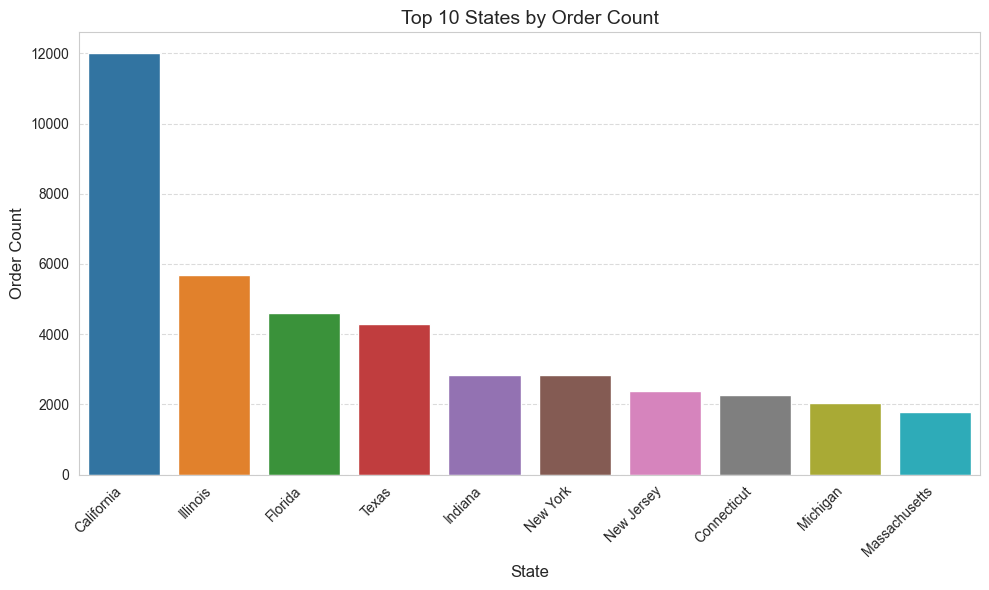

In [117]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10,
    x='state_name',
    y='order_count',
    palette='tab10'
)

plt.title('Top 10 States by Order Count', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [118]:
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,...,latitude,longitude,budget,population,median_income,total_cost,profit,profit_margin_pct,order_month,month
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,32.08354,-81.09983,NaN,145674,36466,10946.058,4048.542,27.0,2014-01,January
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,39.61366,-86.10665,NaN,55586,54176,13969.098,11899.602,46.0,2014-01,January
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,37.66243,-121.87468,NaN,79510,124759,4108.440,1760.760,30.0,2014-01,January
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,39.16533,-86.52639,NaN,84067,30019,7201.964,9166.136,56.0,2014-01,January
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,41.77524,-72.52443,NaN,58007,63158,10082.160,8249.040,45.0,2014-01,January


In [121]:
# Average Profit Margin by State

df['order_profit']= df['order_quantity']*df['unit_price'] - df['cost']*df['order_quantity']

# 1. Aggregate per state (sum revenue + count orders)
state_agg = (
    df
    .groupby('state_name', as_index=False)
    .agg(
        total_profit=('profit', 'sum')
    )
)

# 2. Sort by revenue descending
state_agg = state_agg.sort_values('total_profit', ascending=False)

# 3. Take top 10
top10_profit = state_agg.head(10)

print(top10_profit)


       state_name  total_profit
3      California  8.550839e+07
11       Illinois  4.151722e+07
8         Florida  3.361911e+07
41          Texas  3.144253e+07
30       New York  2.055558e+07
12        Indiana  2.044501e+07
28     New Jersey  1.725970e+07
5     Connecticut  1.649437e+07
20       Michigan  1.478674e+07
19  Massachusetts  1.302974e+07


C:\Users\nitar\AppData\Local\Temp\ipykernel_23656\912067248.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


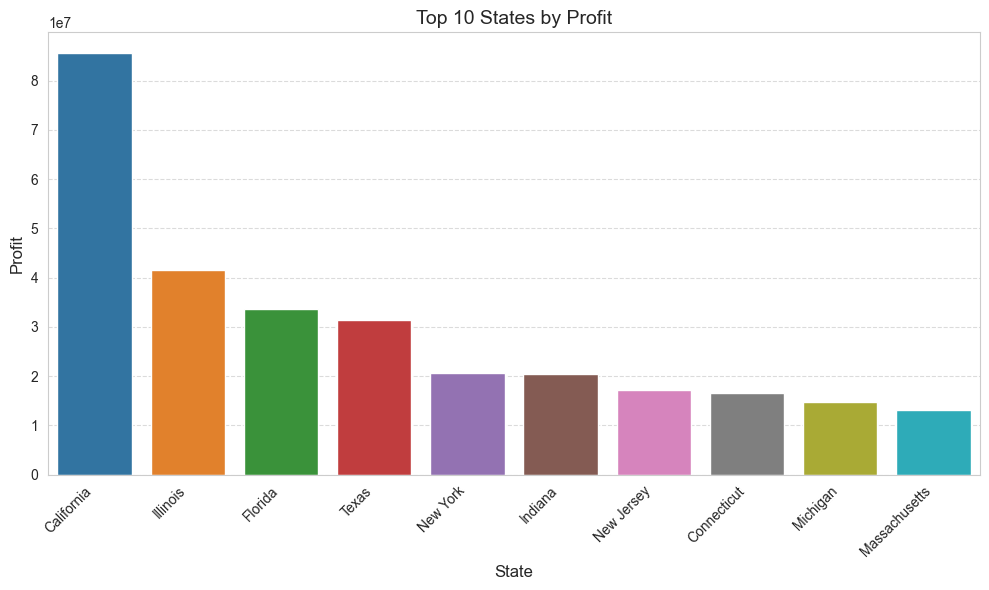

In [123]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_profit,
    x='state_name',
    y='total_profit',
    palette='tab10'
)

plt.title('Top 10 States by Profit', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

        customer_name  total_revenue
4       Aibox Company     12641251.8
131         State Ltd     12220639.2
101      Pixoboo Corp     10986459.0
97       Organon Corp     10955826.6
106      Realbuzz Ltd     10753299.0
156   WOCKHARDT Group     10701963.6
72          Kare Corp     10635633.6
39   Colgate-Pa Group     10107003.6
63        Golden Corp     10007669.4
41      Deseret Group      9942223.8


C:\Users\nitar\AppData\Local\Temp\ipykernel_23656\4247660508.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


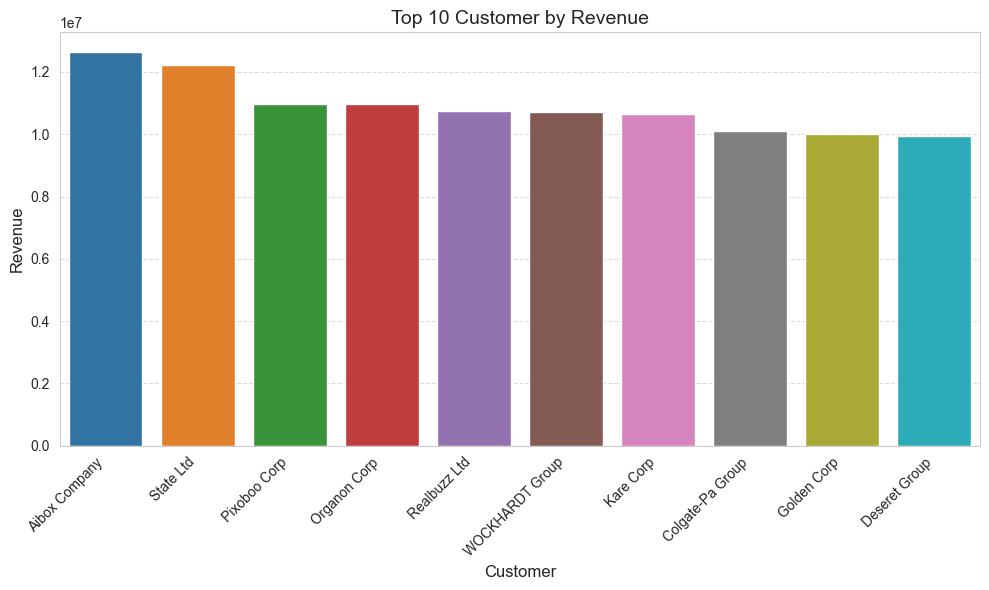

In [126]:
# Top and Bottom Customer by Revenue

# Average Profit Margin by State

# 1. Aggregate per state (sum revenue + count orders)
cust_agg = (
    df
    .groupby('customer_name', as_index=False)
    .agg(
        total_revenue=('revenue', 'sum')
    )
)

# 2. Sort by revenue descending
customer_agg = cust_agg.sort_values('total_revenue', ascending=False)

# 3. Take top 10
top10_cust_profit = customer_agg.head(10)

print(top10_cust_profit)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_cust_profit,
    x='customer_name',
    y='total_revenue',
    palette='tab10'
)

plt.title('Top 10 Customer by Revenue', fontsize=14)
plt.xlabel('Customer', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

    customer_name  total_revenue
17   BB17 Company      4034673.0
163     Yodoo Ltd      4372755.0
84     Mycone Ltd      4534238.4
155  Voonyx Group      4670918.4
117  SEINDNI Corp      4760162.4
49     Epic Group      4807960.2
103     Quaxo Ltd      5026206.0
16    Aveda Group      5037100.2
167  Zoomdog Corp      5047914.0
71    Johnson Ltd      5083410.6


C:\Users\nitar\AppData\Local\Temp\ipykernel_2304\1343698852.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


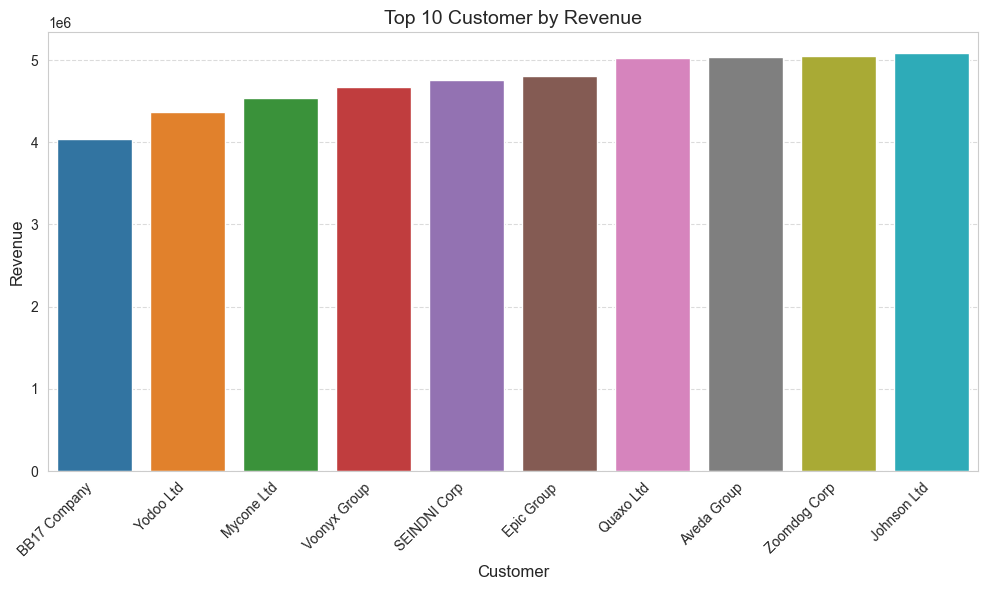

In [36]:
# Sekarang bottom 10

# 1. Aggregate per state (sum revenue + count orders)
cust_agg = (
    df
    .groupby('customer_name', as_index=False)
    .agg(
        total_revenue=('revenue', 'sum')
    )
)

# 2. Sort by revenue descending
customer_agg = cust_agg.sort_values('total_revenue', ascending=True)

# 3. Take top 10
bot10_cust_profit = customer_agg.head(10)

print(bot10_cust_profit)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=bot10_cust_profit,
    x='customer_name',
    y='total_revenue',
    palette='tab10'
)

plt.title('Top 10 Customer by Revenue', fontsize=14)
plt.xlabel('Customer', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [37]:
cust_agg

,customer_name,total_revenue
0,ALK-Abello Ltd,7662321.0
1,Accord Group,7116927.6
2,Accudial Company,5835994.8
3,Actavis Company,7074074.4
4,Aibox Company,12641251.8
...,...,...
170,Zoonoodle Ltd,6394855.2
171,Zooveo Company,7175619.6
172,Zoovu Corp,5682109.2
173,Zooxo Ltd,6287842.8


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       64104 non-null  object        
 1   order_date         64104 non-null  datetime64[ns]
 2   customer_name      64104 non-null  object        
 3   channel            64104 non-null  object        
 4   product_name       64104 non-null  object        
 5   order_quantity     64104 non-null  int64         
 6   unit_price         64104 non-null  float64       
 7   revenue            64104 non-null  float64       
 8   cost               64104 non-null  float64       
 9   state_code         64104 non-null  object        
 10  county             64104 non-null  object        
 11  state_name         64104 non-null  object        
 12  region             64104 non-null  object        
 13  latitude           64104 non-null  float64       
 14  longit

In [ ]:
# Beberapa Segmentasi yang bisa digunakan:
# RFM Segmentation:
# Recency: how many days since their last order
# Frequency: number of unique orders (ot total order_quantity)
# Monetary (based on their revenue)
# Goals: Then create RFM scores (e.g. 1–5). This is the most data-driven way to identify segments like “Champions”, “Loyal Customers”, “At‑Risk” or “Low‑Value” customers.

In [140]:
df

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,...,longitude,budget,population,median_income,total_cost,profit,profit_margin_pct,order_month,month,order_profit
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,-81.09983,NaN,145674,36466,10946.058,4048.542,27.0,2014-01,January,4048.542
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,-86.10665,NaN,55586,54176,13969.098,11899.602,46.0,2014-01,January,11899.602
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,-121.87468,NaN,79510,124759,4108.440,1760.760,30.0,2014-01,January,1760.760
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,-86.52639,NaN,84067,30019,7201.964,9166.136,56.0,2014-01,January,9166.136
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,-72.52443,NaN,58007,63158,10082.160,8249.040,45.0,2014-01,January,8249.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,...,-74.82877,NaN,51326,69878,11765.736,10022.664,46.0,2018-02,February,10022.664
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,...,-88.03424,NaN,69308,71573,3474.486,1711.314,33.0,2018-02,February,1711.314
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,...,-80.20644,NaN,57234,42786,29133.610,14349.390,33.0,2018-02,February,14349.390
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,...,-78.74182,NaN,87514,48662,20511.246,7206.654,26.0,2018-02,February,7206.654


In [38]:
# Let's make gap between now order compared to next order

# 1️⃣ Urut data per customer dan tanggal pesanan
df = df.sort_values(['customer_name', 'order_date'])

# 2️⃣ Ambil tanggal pesanan berikutnya untuk setiap pelanggan
df['next_order_date'] = (
    df.groupby('customer_name')['order_date'].shift(-1)  # -1 → baris selanjutnya
)

# 3️⃣ Hitung selisih dalam hari
df['gap_days'] = (
    df['next_order_date'] - df['order_date']
).dt.days

# 4️⃣ (Opsional) Set NaN pada proses terakhir per customer jadi 0
df['gap_days'] = df['gap_days'].fillna(0).astype(int)

# 5️⃣ Hasil: jumlah hari sejak order ini ke order selanjutnya untuk setiap pelanggan
print(df[['customer_name', 'order_date', 'next_order_date', 'gap_days']].head(8))

      customer_name order_date next_order_date  gap_days
44   ALK-Abello Ltd 2014-01-02      2014-01-04         2
179  ALK-Abello Ltd 2014-01-04      2014-01-05         1
196  ALK-Abello Ltd 2014-01-05      2014-01-05         0
224  ALK-Abello Ltd 2014-01-05      2014-01-06         1
247  ALK-Abello Ltd 2014-01-06      2014-01-09         3
353  ALK-Abello Ltd 2014-01-09      2014-01-11         2
444  ALK-Abello Ltd 2014-01-11      2014-01-12         1
470  ALK-Abello Ltd 2014-01-12      2014-01-14         2


In [39]:
# 1. Aggregate per state (sum revenue + count orders)
cust_agg = (
    df
    .groupby('customer_name', as_index=False)
    .agg(
        days_gap=('gap_days', 'mean')
    )
)

# 2. Sort by revenue descending
customer_agg = cust_agg.sort_values('days_gap', ascending=False)

# 3. Take top 10
top10_gap_days = customer_agg.head(10)
print(top10_gap_days)
last10_gap_days = customer_agg.tail(10)
print(last10_gap_days)

       customer_name  days_gap
9    Amerisourc Corp  6.815315
17      BB17 Company  6.011905
45         EMD Group  6.000000
51        Fatz Group  5.614815
98           Ozu Ltd  5.603704
155     Voonyx Group  5.603704
112  Roberts Company  5.600000
84        Mycone Ltd  5.570370
163        Yodoo Ltd  5.478261
119    SUPERVALU Ltd  5.351064
       customer_name  days_gap
48         Eire Corp  3.232906
101     Pixoboo Corp  3.198312
131        State Ltd  3.189873
20      Blogspan Ltd  3.137500
156  WOCKHARDT Group  3.121399
40   Dazzlesphe Corp  3.115226
133     Talane Group  2.941860
4      Aibox Company  2.928295
106     Realbuzz Ltd  2.869318
72         Kare Corp  2.809259


In [148]:
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,...,population,median_income,total_cost,profit,profit_margin_pct,order_month,month,order_profit,next_order_date,gap_days
44,SO - 0004126,2014-01-02,ALK-Abello Ltd,Wholesale,Product 14,10,3041.8,30418.0,2038.006,FL,...,51617,41494,20380.060,10037.940,33.0,2014-01,January,10037.940,2014-01-04,2
179,SO - 0007533,2014-01-04,ALK-Abello Ltd,Wholesale,Product 4,6,2371.8,14230.8,1209.618,WA,...,60598,103409,7257.708,6973.092,49.0,2014-01,January,6973.092,2014-01-05,1
196,SO - 0004669,2014-01-05,ALK-Abello Ltd,Distributor,Product 21,10,6210.9,62109.0,2857.014,IN,...,71111,40419,28570.140,33538.860,54.0,2014-01,January,33538.860,2014-01-05,0
224,SO - 0005440,2014-01-05,ALK-Abello Ltd,Distributor,Product 5,11,917.9,10096.9,706.783,MO,...,166810,33557,7774.613,2322.287,23.0,2014-01,January,2322.287,2014-01-06,1
247,SO - 0004230,2014-01-06,ALK-Abello Ltd,Export,Product 2,12,1889.4,22672.8,888.018,CA,...,864816,81294,10656.216,12016.584,53.0,2014-01,January,12016.584,2014-01-09,3


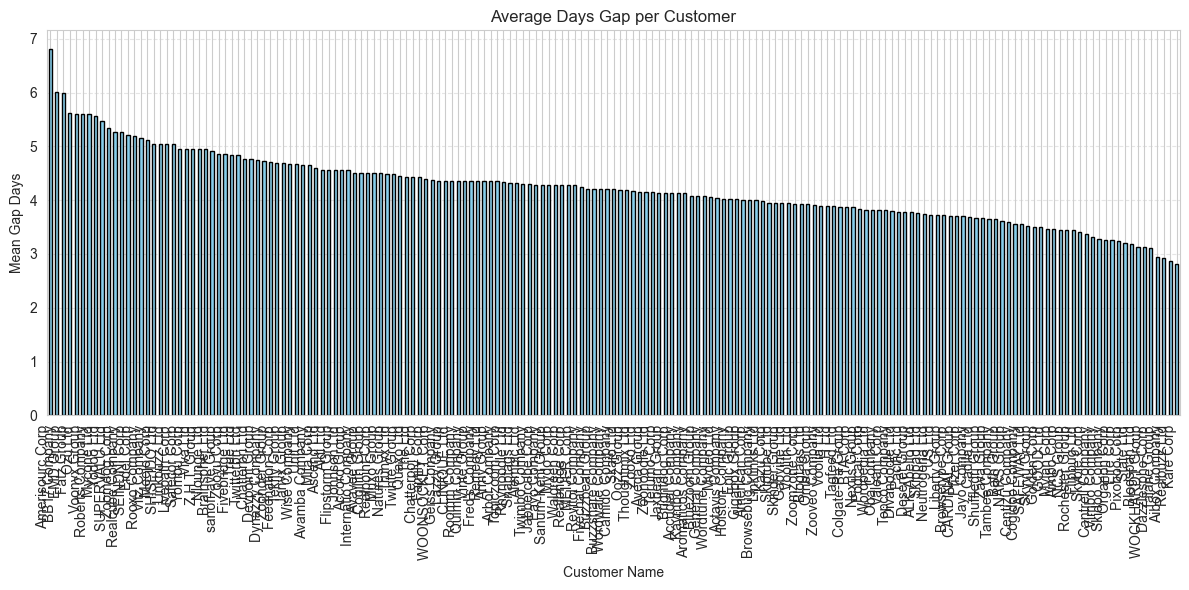

In [40]:
days_gap = df.groupby('customer_name')['gap_days'].mean()
days_gap = days_gap.sort_values(ascending=False)

plt.figure(figsize=(12,6))
days_gap.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Days Gap per Customer')
plt.xlabel('Customer Name')
plt.ylabel('Mean Gap Days')
plt.xticks(rotation=90, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64104 entries, 44 to 63996
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       64104 non-null  object        
 1   order_date         64104 non-null  datetime64[ns]
 2   customer_name      64104 non-null  object        
 3   channel            64104 non-null  object        
 4   product_name       64104 non-null  object        
 5   order_quantity     64104 non-null  int64         
 6   unit_price         64104 non-null  float64       
 7   revenue            64104 non-null  float64       
 8   cost               64104 non-null  float64       
 9   state_code         64104 non-null  object        
 10  county             64104 non-null  object        
 11  state_name         64104 non-null  object        
 12  region             64104 non-null  object        
 13  latitude           64104 non-null  float64       
 14  longitude 

In [58]:
# Sekarang bottom 10

# 1. Aggregate per state (sum revenue + count orders)
cust_agg = (
    df
    .groupby('customer_name', as_index=False)
    .agg(
        profit=('profit', 'sum')
    )
)

       customer_name  total_order
9    Amerisourc Corp          222
17      BB17 Company          252
45         EMD Group          252
51        Fatz Group          270
98           Ozu Ltd          270
112  Roberts Company          270
84        Mycone Ltd          270
155     Voonyx Group          270
163        Yodoo Ltd          276
119    SUPERVALU Ltd          282


C:\Users\nitar\AppData\Local\Temp\ipykernel_23656\3272461843.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


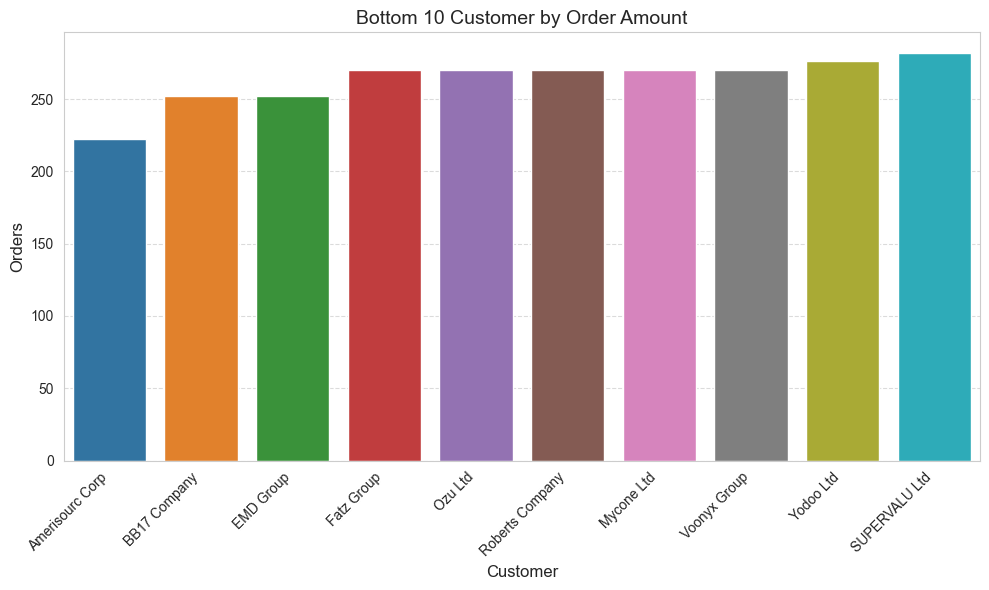

       customer_name  total_order
72         Kare Corp          540
106     Realbuzz Ltd          528
4      Aibox Company          516
133     Talane Group          516
156  WOCKHARDT Group          486
40   Dazzlesphe Corp          486
20      Blogspan Ltd          480
131        State Ltd          474
101     Pixoboo Corp          474
48         Eire Corp          468


C:\Users\nitar\AppData\Local\Temp\ipykernel_23656\3272461843.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


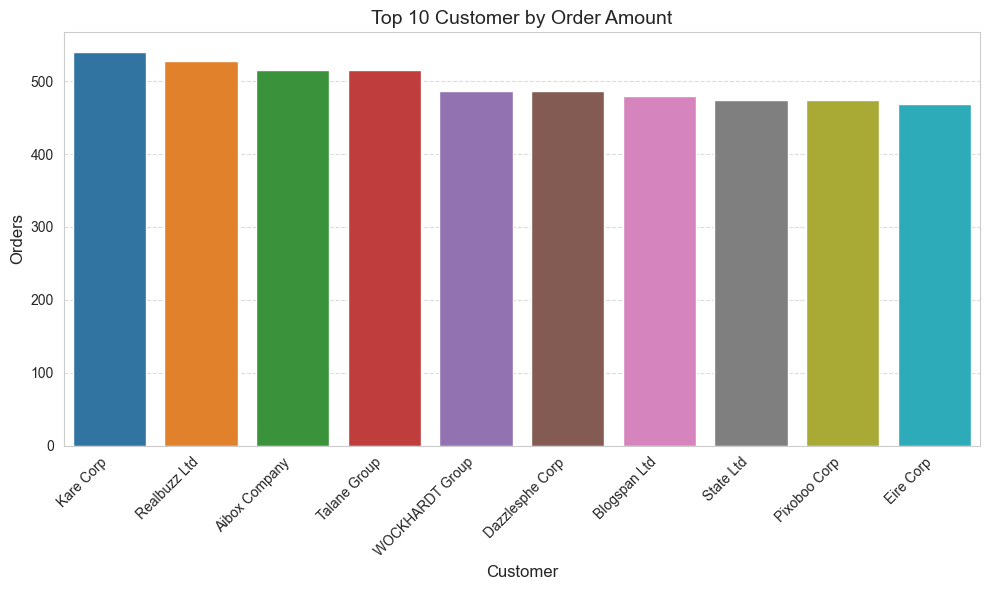

In [164]:
# Sekarang bottom 10

# 1. Aggregate per state (sum revenue + count orders)
cust_agg = (
    df
    .groupby('customer_name', as_index=False)
    .agg(
        total_order=('order_number', 'count')
    )
)

# 2. Sort by revenue descending
customer_agg = cust_agg.sort_values('total_order', ascending=True)

# 3. Take top 10
bot10_cust_profit = customer_agg.head(10)

print(bot10_cust_profit)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=bot10_cust_profit,
    x='customer_name',
    y='total_order',
    palette='tab10'
)

plt.title('Bottom 10 Customer by Order Amount', fontsize=14)
plt.xlabel('Customer', fontsize=12)
plt.ylabel('Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Now the biggest
# 2. Sort by revenue increasing
customer_agg = cust_agg.sort_values('total_order', ascending=False)

# 3. Take top 10
top10_cust_profit = customer_agg.head(10)

print(top10_cust_profit)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_cust_profit,
    x='customer_name',
    y='total_order',
    palette='tab10'
)

plt.title('Top 10 Customer by Order Amount', fontsize=14)
plt.xlabel('Customer', fontsize=12)
plt.ylabel('Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [45]:
# Bikin Indexnya nih terakhir, RFM INDEX

days_gap.head(10)

customer_name
Amerisourc Corp    6.815315
BB17 Company       6.011905
EMD Group          6.000000
Fatz Group         5.614815
Ozu Ltd            5.603704
Voonyx Group       5.603704
Roberts Company    5.600000
Mycone Ltd         5.570370
Yodoo Ltd          5.478261
SUPERVALU Ltd      5.351064
Name: gap_days, dtype: float64

In [167]:
customer_agg.head()

,customer_name,total_order
72,Kare Corp,540
106,Realbuzz Ltd,528
4,Aibox Company,516
133,Talane Group,516
156,WOCKHARDT Group,486


In [168]:
cust.head()

,customer_name,last_order_date,frequency,total_qty,revenue_total,profit_total,avg_order_qty,avg_revenue_per_order,channel_mode,median_income,region,recency_days
0,ALK-Abello Ltd,2018-02-24,67,3450,7662321.0,2956715.226,8.582090,19060.500000,Wholesale,55609.5,South,5
1,Accord Group,2018-02-21,55,2460,7116927.6,2828208.288,7.454545,21566.447273,Wholesale,52738.5,Midwest,8
2,Accudial Company,2018-02-22,61,2682,5835994.8,2108456.634,7.327869,15945.340984,Wholesale,53771.0,South,7
3,Actavis Company,2018-02-28,63,3114,7074074.4,2863854.834,8.238095,18714.482540,Wholesale,51186.0,South,1
4,Aibox Company,2018-02-22,86,4320,12641251.8,4946556.936,8.372093,24498.550000,Wholesale,54081.0,Midwest,7


In [41]:
# 1. Aggregate per state (sum revenue + count orders)
cust_rev = (
    df
    .groupby('customer_name', as_index=False)
    .agg(
        total_revenue=('revenue', 'sum')
    )
)

# 2. Sort by revenue descending
customer_rev = cust_rev.sort_values('total_revenue', ascending=True)
print(customer_rev)

     customer_name  total_revenue
17    BB17 Company      4034673.0
163      Yodoo Ltd      4372755.0
84      Mycone Ltd      4534238.4
155   Voonyx Group      4670918.4
117   SEINDNI Corp      4760162.4
..             ...            ...
106   Realbuzz Ltd     10753299.0
97    Organon Corp     10955826.6
101   Pixoboo Corp     10986459.0
131      State Ltd     12220639.2
4    Aibox Company     12641251.8

[175 rows x 2 columns]


In [42]:
# Now Merge THEM ALLLL

# Merge days gap, total order, and revenue from them

cust_data = customer_rev.merge(
    customer_agg,
    how='left',
    on = "customer_name"
)

In [47]:
# Now Merge THEM ALLLL

# Merge days gap, total order, and revenue from them

cust_datas = cust_data.merge(
    days_gap,
    how='left',
    on = "customer_name"
)

In [48]:
cust_datas

,customer_name,total_revenue,days_gap,gap_days
0,BB17 Company,4034673.0,6.011905,6.011905
1,Yodoo Ltd,4372755.0,5.478261,5.478261
2,Mycone Ltd,4534238.4,5.570370,5.570370
3,Voonyx Group,4670918.4,5.603704,5.603704
4,SEINDNI Corp,4760162.4,5.215278,5.215278
...,...,...,...,...
170,Realbuzz Ltd,10753299.0,2.869318,2.869318
171,Organon Corp,10955826.6,3.266234,3.266234
172,Pixoboo Corp,10986459.0,3.198312,3.198312
173,State Ltd,12220639.2,3.189873,3.189873


In [49]:
cust_datas.to_csv('final_cust_data.csv')

In [59]:
cust_agg

,customer_name,profit
0,ALK-Abello Ltd,2956715.226
1,Accord Group,2828208.288
2,Accudial Company,2108456.634
3,Actavis Company,2863854.834
4,Aibox Company,4946556.936
...,...,...
170,Zoonoodle Ltd,2661819.684
171,Zooveo Company,2739209.508
172,Zoovu Corp,1909049.760
173,Zooxo Ltd,2387807.640


In [59]:
cust_agg

,customer_name,profit
0,ALK-Abello Ltd,2956715.226
1,Accord Group,2828208.288
2,Accudial Company,2108456.634
3,Actavis Company,2863854.834
4,Aibox Company,4946556.936
...,...,...
170,Zoonoodle Ltd,2661819.684
171,Zooveo Company,2739209.508
172,Zoovu Corp,1909049.760
173,Zooxo Ltd,2387807.640


In [61]:
cust_datas = cust_datas.merge(
    cust_agg,
    how='left',
    on = "customer_name"
)

In [63]:
cust_datas.to_csv('Final Cust Data.csv')

In [186]:
cust_datas['RMF'] = (
    cust_datas['total_revenue'] * 0.3
    + cust_datas['total_order'] * 0.3
    - cust_datas['gap_days'] * 0.3
)

cust_datas = cust_datas.sort_values(by='RMF', ascending=False)

In [187]:
cust_datas

,customer_name,total_revenue,total_order,gap_days,RMF
174,Aibox Company,12641251.8,516,2.928295,3.792529e+06
173,State Ltd,12220639.2,474,3.189873,3.666333e+06
172,Pixoboo Corp,10986459.0,474,3.198312,3.296079e+06
171,Organon Corp,10955826.6,462,3.266234,3.286886e+06
170,Realbuzz Ltd,10753299.0,528,2.869318,3.226147e+06
...,...,...,...,...,...
4,SEINDNI Corp,4760162.4,288,5.215278,1.428134e+06
3,Voonyx Group,4670918.4,270,5.603704,1.401355e+06
2,Mycone Ltd,4534238.4,270,5.570370,1.360351e+06
1,Yodoo Ltd,4372755.0,276,5.478261,1.311908e+06


In [188]:
# Keknya satu lagi bisa liat produk apa yang ini mana yang inelastis dan elastis, terus biar liat different marketing approach on this.
# Kalo mereka beli yang inelastis, berarti loyal customer dan emang mereka butuh barang itu, jadi kasih marketing perbulannya ajah. Jaga loyalty dengan mereka juga. Dan itu produk yang bagus kualitasnya jadi bisa jadi eye-catching product.
# Kalo buat barang inferior, liat seasonalnya kapan (mungkin ini produk yg dibeli kalo yg normal lagi abis atau apa), nah baru sesuaikan marketing sesuai seasonnya.

In [190]:
df

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,...,population,median_income,total_cost,profit,profit_margin_pct,order_month,month,order_profit,next_order_date,gap_days
44,SO - 0004126,2014-01-02,ALK-Abello Ltd,Wholesale,Product 14,10,3041.8,30418.0,2038.006,FL,...,51617,41494,20380.060,10037.940,33.0,2014-01,January,10037.940,2014-01-04,2
179,SO - 0007533,2014-01-04,ALK-Abello Ltd,Wholesale,Product 4,6,2371.8,14230.8,1209.618,WA,...,60598,103409,7257.708,6973.092,49.0,2014-01,January,6973.092,2014-01-05,1
196,SO - 0004669,2014-01-05,ALK-Abello Ltd,Distributor,Product 21,10,6210.9,62109.0,2857.014,IN,...,71111,40419,28570.140,33538.860,54.0,2014-01,January,33538.860,2014-01-05,0
224,SO - 0005440,2014-01-05,ALK-Abello Ltd,Distributor,Product 5,11,917.9,10096.9,706.783,MO,...,166810,33557,7774.613,2322.287,23.0,2014-01,January,2322.287,2014-01-06,1
247,SO - 0004230,2014-01-06,ALK-Abello Ltd,Export,Product 2,12,1889.4,22672.8,888.018,CA,...,864816,81294,10656.216,12016.584,53.0,2014-01,January,12016.584,2014-01-09,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63212,SO - 0002335,2018-02-07,sanofi-ave Group,Wholesale,Product 25,5,676.7,3383.5,311.282,CO,...,53696,66053,1556.410,1827.090,54.0,2018-02,February,1827.090,2018-02-09,2
63258,SO - 0004181,2018-02-09,sanofi-ave Group,Export,Product 26,6,1125.6,6753.6,877.968,NY,...,213776,80327,5267.808,1485.792,22.0,2018-02,February,1485.792,2018-02-09,0
63272,SO - 0002600,2018-02-09,sanofi-ave Group,Distributor,Product 3,11,2653.2,29185.2,1326.600,IN,...,103365,41504,14592.600,14592.600,50.0,2018-02,February,14592.600,2018-02-16,7
63569,SO - 0002880,2018-02-16,sanofi-ave Group,Wholesale,Product 14,7,2231.1,15617.7,1472.526,CA,...,130104,52157,10307.682,5310.018,34.0,2018-02,February,5310.018,2018-02-26,10


In [50]:
# List of inelastic product names (strings) and IDs (integers)
inelastic_products = ['Product 26', 'Product 5', 'Product 14', 'Product 13']

# Create column: 1 if product_name matches any listed, else 0
df['inelastic'] = df['product_name'].isin(inelastic_products).astype(int)

df

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,...,budget,population,median_income,total_cost,profit,profit_margin_pct,month,next_order_date,gap_days,inelastic
44,SO - 0004126,2014-01-02,ALK-Abello Ltd,Wholesale,Product 14,10,3041.8,30418.0,2038.006,FL,...,NaN,51617,41494,20380.060,10037.940,33.0,January,2014-01-04,2,1
179,SO - 0007533,2014-01-04,ALK-Abello Ltd,Wholesale,Product 4,6,2371.8,14230.8,1209.618,WA,...,NaN,60598,103409,7257.708,6973.092,49.0,January,2014-01-05,1,0
196,SO - 0004669,2014-01-05,ALK-Abello Ltd,Distributor,Product 21,10,6210.9,62109.0,2857.014,IN,...,NaN,71111,40419,28570.140,33538.860,54.0,January,2014-01-05,0,0
224,SO - 0005440,2014-01-05,ALK-Abello Ltd,Distributor,Product 5,11,917.9,10096.9,706.783,MO,...,NaN,166810,33557,7774.613,2322.287,23.0,January,2014-01-06,1,1
247,SO - 0004230,2014-01-06,ALK-Abello Ltd,Export,Product 2,12,1889.4,22672.8,888.018,CA,...,NaN,864816,81294,10656.216,12016.584,53.0,January,2014-01-09,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63212,SO - 0002335,2018-02-07,sanofi-ave Group,Wholesale,Product 25,5,676.7,3383.5,311.282,CO,...,NaN,53696,66053,1556.410,1827.090,54.0,February,2018-02-09,2,0
63258,SO - 0004181,2018-02-09,sanofi-ave Group,Export,Product 26,6,1125.6,6753.6,877.968,NY,...,NaN,213776,80327,5267.808,1485.792,22.0,February,2018-02-09,0,1
63272,SO - 0002600,2018-02-09,sanofi-ave Group,Distributor,Product 3,11,2653.2,29185.2,1326.600,IN,...,NaN,103365,41504,14592.600,14592.600,50.0,February,2018-02-16,7,0
63569,SO - 0002880,2018-02-16,sanofi-ave Group,Wholesale,Product 14,7,2231.1,15617.7,1472.526,CA,...,NaN,130104,52157,10307.682,5310.018,34.0,February,2018-02-26,10,1


In [51]:
# List of inelastic product names (strings) and IDs (integers)
substitutable_products = ['Product 2', 'Product 3', 'Product 22', 'Product 27', 'Product 7', 'Product 9', 'Product 21', 'Product 23']

# Create column: 1 if product_name matches any listed, else 0
df['subs'] = df['product_name'].isin(substitutable_products).astype(int)

df

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,...,population,median_income,total_cost,profit,profit_margin_pct,month,next_order_date,gap_days,inelastic,subs
44,SO - 0004126,2014-01-02,ALK-Abello Ltd,Wholesale,Product 14,10,3041.8,30418.0,2038.006,FL,...,51617,41494,20380.060,10037.940,33.0,January,2014-01-04,2,1,0
179,SO - 0007533,2014-01-04,ALK-Abello Ltd,Wholesale,Product 4,6,2371.8,14230.8,1209.618,WA,...,60598,103409,7257.708,6973.092,49.0,January,2014-01-05,1,0,0
196,SO - 0004669,2014-01-05,ALK-Abello Ltd,Distributor,Product 21,10,6210.9,62109.0,2857.014,IN,...,71111,40419,28570.140,33538.860,54.0,January,2014-01-05,0,0,1
224,SO - 0005440,2014-01-05,ALK-Abello Ltd,Distributor,Product 5,11,917.9,10096.9,706.783,MO,...,166810,33557,7774.613,2322.287,23.0,January,2014-01-06,1,1,0
247,SO - 0004230,2014-01-06,ALK-Abello Ltd,Export,Product 2,12,1889.4,22672.8,888.018,CA,...,864816,81294,10656.216,12016.584,53.0,January,2014-01-09,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63212,SO - 0002335,2018-02-07,sanofi-ave Group,Wholesale,Product 25,5,676.7,3383.5,311.282,CO,...,53696,66053,1556.410,1827.090,54.0,February,2018-02-09,2,0,0
63258,SO - 0004181,2018-02-09,sanofi-ave Group,Export,Product 26,6,1125.6,6753.6,877.968,NY,...,213776,80327,5267.808,1485.792,22.0,February,2018-02-09,0,1,0
63272,SO - 0002600,2018-02-09,sanofi-ave Group,Distributor,Product 3,11,2653.2,29185.2,1326.600,IN,...,103365,41504,14592.600,14592.600,50.0,February,2018-02-16,7,0,1
63569,SO - 0002880,2018-02-16,sanofi-ave Group,Wholesale,Product 14,7,2231.1,15617.7,1472.526,CA,...,130104,52157,10307.682,5310.018,34.0,February,2018-02-26,10,1,0


In [52]:
cust_product = (df.groupby('customer_name').agg(inelastic_sum=('inelastic', 'sum'),subs_sum=('subs', 'sum')))
print(cust_product.head())

                  inelastic_sum  subs_sum
customer_name                            
ALK-Abello Ltd               78        78
Accord Group                 54        84
Accudial Company             84        84
Actavis Company             114        48
Aibox Company               156        96


In [53]:
cust_product = cust_product.sort_values(by='subs_sum', ascending=False)
print(cust_product.head(10))

                  inelastic_sum  subs_sum
customer_name                            
Yombu Corp                   54       132
GOOD Ltd                    132       114
NCS Group                   108       114
Realbuzz Ltd                210       108
Buzzbean Group               72       108
Vimbo Company               114       108
Wordware Company            108       108
WOCKHARDT Group             132       108
Roberts Company              42       108
Brightdog Corp               90       102


In [54]:
cust_product = cust_product.sort_values(by='inelastic_sum', ascending=False)
print(cust_product.head(10))

                 inelastic_sum  subs_sum
customer_name                           
Realbuzz Ltd               210       108
Dazzlesphe Corp            180        84
Talane Group               174       102
Blogspan Ltd               174        78
Aibox Company              156        96
Golden Corp                150        60
Skidoo Company             150        84
Zooveo Company             150        30
Skajo Ltd                  144        72
Pfizer Corp                144        90


In [56]:
cust_product.to_csv('Product 4.csv')